In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline 

In [15]:
path="C:/Study/1. DataSciecne/1. Learning/8. Kaggel/Titanic/titanic/train.csv"

In [16]:
df=pd.read_csv(path)

## Data Exploration

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.shape

(891, 12)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

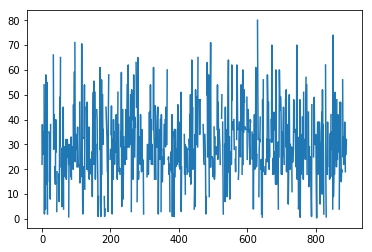

In [19]:
df['Age'].plot()


## Imputation for numeric field

In [15]:
def impute_na(df,variable):
    median=df[variable].median()
    df[variable+'_Median']=df[variable].fillna(median)
    mean=df[variable].mean()
    df[variable+'_mean']=df[variable].fillna(mean)
    df[variable+'_zero']=df[variable].fillna(0)
    

In [24]:
impute_na(df,'Age')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_mean,Age_zero
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Median,Age_mean,Age_zero
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.361582,29.699118,23.799293
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.019697,13.002015,17.596074
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,6.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,28.000000,29.699118,24.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000


In [27]:
#For age we would need to do imputation using mean as mean imputation has low variance.
#For Cabin, we should need to replace with "unknown" as 77% passangers are does not have Cabin assigned.
# 0.2 % record does not have Embarked. We can ignore that records.

In [28]:
(2/891)*100

0.22446689113355783

In [26]:
round((df['Cabin'].isnull().sum()/df.shape[0])*100,2)

77.1

In [49]:
df.shape[0]

891

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
df['Cabin_num']=np.where(df['Cabin'].isnull(),0,1)

In [30]:
pd.crosstab(df['Survived'],df['Cabin_num'])

Cabin_num,0,1
Survived,,
0,481,68
1,206,136


In [31]:
206/(206+136)

0.6023391812865497

In [32]:
136/(206+136)

0.39766081871345027

In [61]:
df.groupby('Cabin_num')['Survived'].mean()

Cabin_num
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [ ]:
#there is not 50/50 % ration then we can not convert cabin into 0 ad 1 category.

## Final Imputation 

In [3]:
df1=pd.read_csv(path)

In [4]:
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

In [6]:
df1['Age'].isnull().sum()

0

In [7]:
df1['Cabin']=df1['Cabin'].fillna("unknown")

In [8]:
finaldf=df1[~df1['Embarked'].isnull()]

In [9]:
df1.shape

(891, 12)

In [10]:
finaldf.shape

(889, 12)

In [11]:
finaldf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Data explanation and Encoding

In [17]:
finaldf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


In [18]:
finaldf['Cabin'].unique()

array(['unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

##### Dropping the column which is having distinct values for every record as it is not helpful for model

In [40]:
finaldf['PassengerId'].nunique()

889

In [41]:
finaldf['Name'].nunique()

889

In [45]:
finaldf['Ticket'].nunique()

680

In [47]:
finaldf['Ticket'].duplicated().sum()

209

##### top 10 duplicated tickets

In [57]:
finaldf.groupby(finaldf['Ticket'][finaldf['Ticket'].duplicated()]).count()['Ticket'].sort_values(ascending=False).iloc[0:10]

Ticket
CA. 2343        6
1601            6
347082          6
CA 2144         5
347088          5
3101295         5
382652          4
S.O.C. 14879    4
349909          3
4133            3
Name: Ticket, dtype: int64

In [67]:
titanic=finaldf.drop(['PassengerId','Name','Ticket'],axis=1)

In [69]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,unknown,S


In [60]:
pd.crosstab(titanic['Survived'],titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,231,109


In [23]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
#Sex column weight of evidence encoding
prob_df=df.groupby(['Sex'])['Survived'].mean()
prob_df=pd.DataFrame(prob_df)
prob_df['Not_Survived']=1-prob_df['Survived']
prob_df

,Survived,Not_Survived
Sex,,
female,0.742038,0.257962
male,0.188908,0.811092


In [36]:
np.log(prob_df['Survived']/prob_df['Not_Survived'])

Sex
female    1.056589
male     -1.457120
dtype: float64

In [38]:
prob_df['WOE']=np.log(prob_df['Survived']/prob_df['Not_Survived'])

In [41]:
prob_df

,Survived,Not_Survived,WOE
Sex,,,
female,0.742038,0.257962,1.056589
male,0.188908,0.811092,-1.457120


In [42]:
woe_sex_lables=prob_df['WOE'].to_dict()
woe_sex_lables

{'female': 1.0565892988932615, 'male': -1.4571204136885032}

In [43]:
titanic['WOE_SEX']=titanic['Sex'].map(woe_sex_lables)

In [44]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WOE_SEX
0,0,3,male,22.0,1,0,A/5 21171,7.2500,unknown,S,-1.457120
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1.056589
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1.056589
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1.056589
4,0,3,male,35.0,0,0,373450,8.0500,unknown,S,-1.457120


In [25]:
#Weight of Evidence encoding function

def WOE(df,column,targetcolumn):
    prob_df=df.groupby([column])[targetcolumn].mean()
    prob_df=pd.DataFrame(prob_df)
    prob_df['Not_'+targetcolumn]=1-prob_df[targetcolumn]
    # since the log of zero is not defined
    prob_df.loc[prob_df[targetcolumn] == 0, targetcolumn] = 0.00001
    prob_df.loc[prob_df['Not_'+targetcolumn] == 0, 'Not_'+targetcolumn] = 0.00001
    prob_df['WOE']=np.log(prob_df[targetcolumn]/prob_df['Not_'+targetcolumn])
    woe_lables=prob_df['WOE'].to_dict()
    print(woe_lables)
    df['WOE_'+column]=titanic[column].map(woe_lables)

In [71]:
WOE(titanic,'Sex','Survived')

{'female': 1.047968555849355, 'male': -1.4571204136885032}


In [72]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WOE_Sex
0,0,3,male,22.0,1,0,7.2500,unknown,S,-1.457120
1,1,1,female,38.0,1,0,71.2833,C85,C,1.047969
2,1,3,female,26.0,0,0,7.9250,unknown,S,1.047969
3,1,1,female,35.0,1,0,53.1000,C123,S,1.047969
4,0,3,male,35.0,0,0,8.0500,unknown,S,-1.457120


In [73]:
WOE(titanic,'Embarked','Survived')
titanic.head()

{'C': 0.21511137961694568, 'Q': -0.44895022004790314, 'S': -0.6768866596881652}


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WOE_Sex,WOE_Embarked
0,0,3,male,22.0,1,0,7.2500,unknown,S,-1.457120,-0.676887
1,1,1,female,38.0,1,0,71.2833,C85,C,1.047969,0.215111
2,1,3,female,26.0,0,0,7.9250,unknown,S,1.047969,-0.676887
3,1,1,female,35.0,1,0,53.1000,C123,S,1.047969,-0.676887
4,0,3,male,35.0,0,0,8.0500,unknown,S,-1.457120,-0.676887


In [ ]:
WOE(titanic,'Cabin','Survived')


In [75]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WOE_Sex,WOE_Embarked,WOE_Cabin
0,0,3,male,22.0,1,0,7.2500,unknown,S,-1.457120,-0.676887,-0.847991
1,1,1,female,38.0,1,0,71.2833,C85,C,1.047969,0.215111,11.512925
2,1,3,female,26.0,0,0,7.9250,unknown,S,1.047969,-0.676887,-0.847991
3,1,1,female,35.0,1,0,53.1000,C123,S,1.047969,-0.676887,0.000000
4,0,3,male,35.0,0,0,8.0500,unknown,S,-1.457120,-0.676887,-0.847991


In [76]:
WOE(titanic,'Pclass','Survived')

{1: 0.5158131652770295, 2: -0.10880285984879919, 3: -1.1397703611616172}


In [81]:
titanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [77]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WOE_Sex,WOE_Embarked,WOE_Cabin,WOE_Pclass
0,0,3,male,22.0,1,0,7.2500,unknown,S,-1.457120,-0.676887,-0.847991,-1.139770
1,1,1,female,38.0,1,0,71.2833,C85,C,1.047969,0.215111,11.512925,0.515813
2,1,3,female,26.0,0,0,7.9250,unknown,S,1.047969,-0.676887,-0.847991,-1.139770
3,1,1,female,35.0,1,0,53.1000,C123,S,1.047969,-0.676887,0.000000,0.515813
4,0,3,male,35.0,0,0,8.0500,unknown,S,-1.457120,-0.676887,-0.847991,-1.139770


In [79]:
titanic.groupby('Survived').count().iloc[:,1]

Survived
0    549
1    340
Name: Sex, dtype: int64

In [80]:
549/titanic.shape[0]

0.6175478065241845

In [82]:
titanic=titanic.drop(['Sex','Embarked','Cabin','Pclass'],axis=1)

In [83]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,WOE_Sex,WOE_Embarked,WOE_Cabin,WOE_Pclass
0,0,22.0,1,0,7.2500,-1.457120,-0.676887,-0.847991,-1.139770
1,1,38.0,1,0,71.2833,1.047969,0.215111,11.512925,0.515813
2,1,26.0,0,0,7.9250,1.047969,-0.676887,-0.847991,-1.139770
3,1,35.0,1,0,53.1000,1.047969,-0.676887,0.000000,0.515813
4,0,35.0,0,0,8.0500,-1.457120,-0.676887,-0.847991,-1.139770


In [88]:
titanic.iloc[:,[1,2,3,4,5,6,7,8]].head()

,Age,SibSp,Parch,Fare,WOE_Sex,WOE_Embarked,WOE_Cabin,WOE_Pclass
0,22.0,1,0,7.2500,-1.457120,-0.676887,-0.847991,-1.139770
1,38.0,1,0,71.2833,1.047969,0.215111,11.512925,0.515813
2,26.0,0,0,7.9250,1.047969,-0.676887,-0.847991,-1.139770
3,35.0,1,0,53.1000,1.047969,-0.676887,0.000000,0.515813
4,35.0,0,0,8.0500,-1.457120,-0.676887,-0.847991,-1.139770


## writing back the data

In [100]:
titanic.to_csv("titanic_train_clean.csv")

## Kaggel Test Data

In [20]:
test=pd.read_csv("C:/Study/1. DataSciecne/1. Learning/8. Kaggel/Titanic/titanic/test.csv")

In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test=test.drop(['PassengerId','Name','Ticket'],axis=1)

In [23]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [12]:
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
test.shape

(418, 8)

In [16]:
impute_na(test,'Age')

In [17]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Median,Age_mean,Age_zero
0,3,male,34.5,0,0,7.8292,NaN,Q,34.5,34.5,34.5
1,3,female,47.0,1,0,7.0000,NaN,S,47.0,47.0,47.0
2,2,male,62.0,0,0,9.6875,NaN,Q,62.0,62.0,62.0
3,3,male,27.0,0,0,8.6625,NaN,S,27.0,27.0,27.0
4,3,female,22.0,1,1,12.2875,NaN,S,22.0,22.0,22.0


In [19]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Age_Median,Age_mean,Age_zero
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,29.599282,30.272590,24.044258
std,0.841838,14.181209,0.896760,0.981429,55.907576,12.703770,12.634534,17.599608
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.170000,0.170000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,23.000000,23.000000,9.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,27.000000,30.272590,24.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,35.750000,35.750000,35.750000
max,3.000000,76.000000,8.000000,9.000000,512.329200,76.000000,76.000000,76.000000


##### Null imputation

In [24]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [26]:
test['Cabin']=test['Cabin'].fillna("unknown")

In [27]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,unknown,Q
1,3,female,47.0,1,0,7.0000,unknown,S
2,2,male,62.0,0,0,9.6875,unknown,Q
3,3,male,27.0,0,0,8.6625,unknown,S
4,3,female,22.0,1,1,12.2875,unknown,S


In [28]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

## Encoding

In [ ]:
WOE(test,'Sex','Survived')